In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/Categorical.csv')

In [11]:
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [8]:
data.describe(include='all')

,name,Longitude,Latitude,continent
count,241,241.000000,241.000000,241
unique,241,NaN,NaN,8
top,Aruba,NaN,NaN,Africa
freq,1,NaN,NaN,54
mean,NaN,14.215380,17.169377,NaN
std,NaN,72.013654,26.554014,NaN
min,NaN,-177.348348,-80.508579,NaN
25%,NaN,-36.433184,1.358761,NaN
50%,NaN,18.644925,17.277500,NaN
75%,NaN,47.587005,39.115541,NaN


In [17]:
data_mapped = data.copy()

In [18]:
data_mapped['continent'] = data_mapped['continent'].map({'Africa':0, 'Asia':1, 'Europe':2,'North America':3,'South America':4,
                                                         'Oceania':5, 'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2


In [110]:
X = data_mapped.iloc[:, 1:4]

In [111]:
X

,Longitude,Latitude,continent
0,-69.982677,12.520880,3
1,66.004734,33.835231,1
2,17.537368,-12.293361,0
3,-63.064989,18.223959,3
4,20.049834,41.142450,2
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,1
238,25.083901,-29.000341,0
239,27.774759,-13.458242,0


In [112]:
from sklearn.cluster import KMeans

In [113]:
kmeans = KMeans(4)

In [114]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [115]:
clustered_data = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [116]:
clustered_data

array([3, 2, 2, 3, 0, 0, 0, 2, 3, 2, 3, 2, 1, 2, 3, 1, 0, 2, 2, 0, 0, 0,
       1, 0, 2, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 1, 2, 2, 0, 3, 1, 0, 2,
       2, 2, 3, 3, 2, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 2, 2,
       0, 0, 2, 0, 1, 3, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3,
       1, 3, 1, 2, 3, 0, 3, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 3, 0, 2,
       1, 2, 2, 2, 2, 1, 3, 3, 1, 0, 2, 1, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0,
       1, 3, 0, 0, 0, 2, 2, 3, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 3, 2, 2, 1,
       2, 1, 0, 1, 0, 3, 3, 0, 0, 2, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1, 0, 3,
       1, 0, 3, 2, 3, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 3, 0, 1, 0, 3, 0, 2,
       2, 3, 0, 2, 3, 0, 0, 0, 2, 3, 2, 2, 3, 2, 0, 1, 2, 2, 1, 3, 3, 0,
       0, 1, 2, 2, 0, 3, 3, 2, 0, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 2, 2],
      dtype=int32)

In [117]:
data_with_clustered = data_mapped.copy()

In [118]:
data_with_clustered['Cluster'] = clustered_data
data_with_clustered

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,3,3
1,Afghanistan,66.004734,33.835231,1,2
2,Angola,17.537368,-12.293361,0,2
3,Anguilla,-63.064989,18.223959,3,3
4,Albania,20.049834,41.142450,2,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,3
237,Yemen,47.586762,15.909280,1,2
238,South Africa,25.083901,-29.000341,0,2
239,Zambia,27.774759,-13.458242,0,2


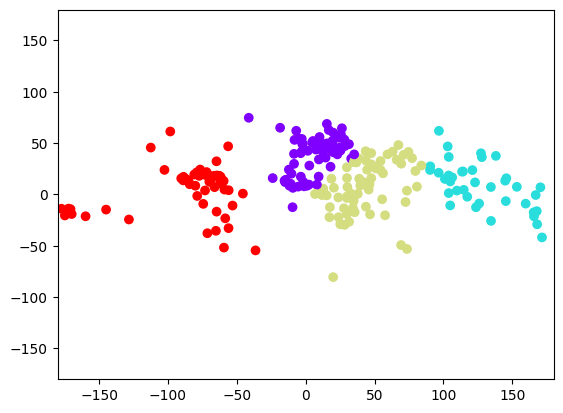

In [119]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clustered['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.show()

In [120]:
kmeans.inertia_

257056.43335377026

In [99]:
wcss = []

for i in range(1,25):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_

  wcss.append(wcss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [108]:
wcss

[727.4024896265555,
 206.60047012435547,
 73.14292046839788,
 45.403635030902755,
 18.655971479500895,
 8.969696969696972,
 0.8888888888888891,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

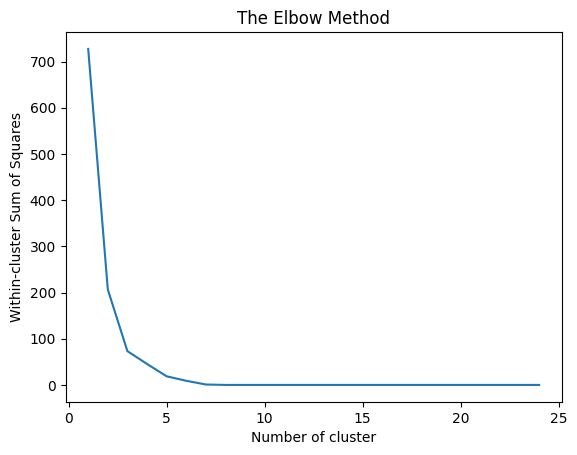

In [109]:
number_cluster = range(1, 25)
plt.plot(number_cluster, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Within-cluster Sum of Squares')